<a href="https://colab.research.google.com/github/AgaydarovaDina/Final_work/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

**Задание 1.** Прочитаем файл

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Задание 2.** Расчитем основным статистические показатели

In [ ]:
#Перед расчетом убедимся, что данные корреткные и нет необходимости в очистке данных
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**Задание 3.** Расчитаем и проанализируем корелляционную матрицу

satisfaction_level - **количественный**

Last_evaluation - качественный

number_projects - **количественный**

average_monthly_hours - **количественный**

time_spend_company - **количественный**

work_accident - качественный

left - качественный

promotion_last_5years - качественный

department - качественный

salary - качественный

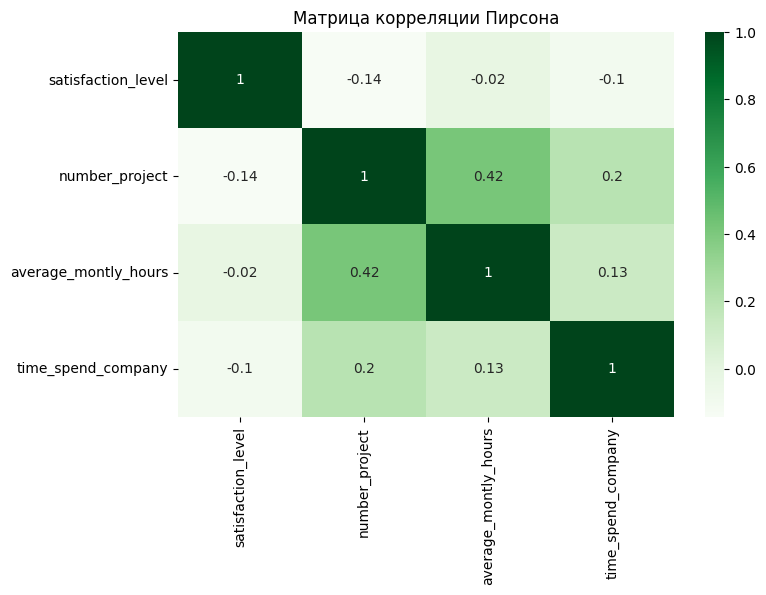

In [ ]:
corr_matrix_pearson = df[['satisfaction_level',  'number_project', 'average_montly_hours', 'time_spend_company']].corr()
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix_pearson, annot=True, cmap='Greens')
plt.title("Матрица корреляции Пирсона")
plt.show()

На графике видно, что колчечество проектов и время на рабочем месте находятся в достаточно высокой зависимости, что в целм логично. Также количество проектов достоточно сильно зависит от стажа в компании, что тоже логчино.
Уровень удовлентворенности работой практически не зависит от времени, проведнного за рабочим местом, стажа в компании и количества проектов. Стаж работы в компании также не зависит от времени, проведенным за рабочим местом.


**Задание 4.** Расчитаем сколько сотрудников работает в каждом отделе

In [ ]:
df['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

**Задание 5**. Покажем распределение сотрудников по зарплате

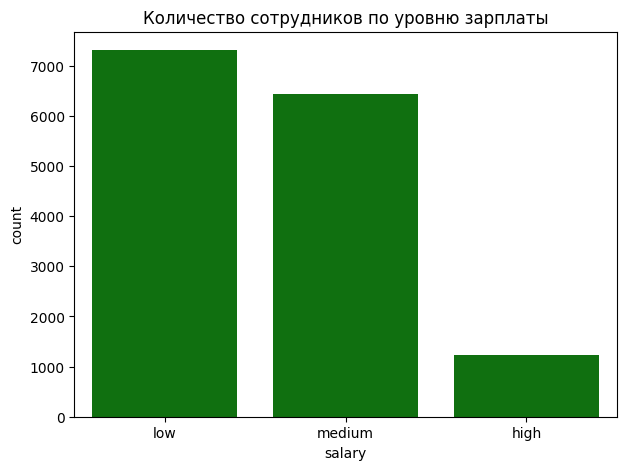

In [ ]:
plt.figure(figsize=[7,5])
sns.countplot(data=df, x="salary", color="green")
plt.title("Количество сотрудников по уровню зарплаты")
plt.show()

**Задание 6.** Покажем распределение по уровню зарплаты в каждом департаменте по отдельности

In [ ]:
pd.crosstab(df['department'], df['salary'], margins=True)

salary,high,low,medium,All
department,,,,
IT,83,609,535,1227
RandD,51,364,372,787
accounting,74,358,335,767
hr,45,335,359,739
management,225,180,225,630
marketing,80,402,376,858
product_mng,68,451,383,902
sales,269,2099,1772,4140
support,141,1146,942,2229


**Задание 7.** Проверим гипотезу, что сотрудники с большим окладом проводят на работе больше времени, чем сотрудники с более низким окладом.

In [ ]:
data_high = df.loc[df['salary']=='high']['average_montly_hours'].values
data_medium = df.loc[df['salary']=='medium']['average_montly_hours'].values
data_low = df.loc[df['salary']=='low']['average_montly_hours'].values

#проверим нормальность распределения данных
stat, p = st.shapiro(data_low)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

#проверим равенство вариаций
stat, p = st.levene(data_high,data_medium,data_low)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p <0.05:
    print("Отклоняем нулевую гипотезу >> Вариация в группах раличается")
else:
    print("Не отклоняем нулевую гипотезу >> Вариация в группах одинаковая")

#проводим однофакторный дисперсионный анализ
fvalue, pvalue = st.f_oneway(data_high,data_medium,data_low)

print(f"Статистика = {fvalue:.5f}, p = {pvalue:.5f}")

if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')


stat = 0.960, p = 0.00000
Вероятно не нормальное распределение
Статистика = 14.48943, p = 0.00000
Отклоняем нулевую гипотезу >> Вариация в группах раличается
Статистика = 0.45836, p = 0.63233
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


**Вывод**. Тест не показал наличие статистически значимой разницы между зарплатой и времем работы

**Задание 8**. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [ ]:
df.groupby('left')['promotion_last_5years'].sum() / df['promotion_last_5years'].count()

left
0    0.020001
1    0.001267
Name: promotion_last_5years, dtype: float64

In [ ]:
df.groupby('left')['satisfaction_level'].mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [ ]:
df.groupby('left')['number_project'].mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

**Задание 9**. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [ ]:
df.drop(['salary', 'department'], axis=1)
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [ ]:
data_class = df['left']. to_numpy ()
data_class

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(df, data_class, test_size=0.25, random_state=42)
len(y_test)
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# обучаем данные
lda.fit(X_train, y_train)
# делаем прогноз на тестовой выборке
lda.predict(X_test)
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [ ]:
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,0
3748,0,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

0.7536

In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.58366087e+00,  6.57019075e-01, -2.18430857e-01,
         4.47682750e-03,  2.22165799e-01, -1.04525663e+00,
         0.00000000e+00, -1.10730495e+00]])